# Product Matching
### Kelompok 1
1. 12S16002 - Diana Pebrianty Pakpahan
2. 12S16022 - Rosa Afresia Siagian
3. 12S16026 - Yolanda Nainggolan
4. 12S16028 - Kaleb Lonari Simanungkalit


### Dataset
Data yang digunakan pada proyek ini berasal dari kaggle (https://www.kaggle.com/PromptCloudHQ/innerwear-data-from-victorias-secret-and-others) yang terdiri dari 9 file csv mengenai produk pakaian dalam.

## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re

df_1 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/ae_com.csv')
df_2 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/amazon_com.csv')
df_3 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/btemptd_com.csv')
df_4 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/calvinklein_com.csv')
df_5 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/hankypanky_com.csv')
df_6 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/macys_com.csv')
df_7 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/shop_nordstrom_com.csv')
df_8 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/us_topshop_com.csv')
df_9 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/victoriassecret_com.csv')

C:\Users\Yolanda Nainggolan\Anaconda3\lib\site-packages\tqdm\std.py:654: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
dataFrame = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9])
dataFrame.sample(5)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
304934,The Lacie Medallion Lace Thong Panty,$10.50,$4.99,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Medallion Lace Thong Panty,Victoriassecret US,The world’s sexiest no-show thong in supersoft...,NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",M,champagne
384574,PINK NEW! High Waist Strappy Bikini Bottom,$34.95,$34.95,https://www.victoriassecret.com/pink/shop-all-...,Victoria's Secret Pink,High Waist Strappy Bikini Bottom,Victoriassecret US,"Rock the retro-vibe with open, crisscross side...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L""]",S,red pepper palm print
393781,Victoria Sport NEW! Incredible by Victoria Spo...,$36.50,$36.50,https://www.victoriassecret.com/victorias-secr...,Victoria's Secret,Incredible by Victoria Sport Front-close Sport...,Victoriassecret US,Game-changer: your favorite maximum-support sp...,4.0,261.0,NaN,"[""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""32DDD"", ...",38DD,Black
280826,Body by Victoria Lace Triangle Underwire Bralette,$34.50,$14.99,https://www.victoriassecret.com/bras/shop-all-...,Victoria's Secret,Lace Triangle Underwire Bralette,Victoriassecret US,"Unlined and all you, this bralette has a flexi...",NaN,NaN,NaN,"[""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""34A"", ""3...",32A,faded denim lace
145615,Dream Angels NEW! Crochet Lace Cheekster Panty,$25.00,$25.00,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Crochet Lace Cheekster Panty,Victoriassecret US,"The prettiest crochet lace, in a cheekini shap...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",XL,black


## 2. Data Preprocessing

In [3]:
dataFrame = dataFrame[['product_name', 'description']]
dataFrame = dataFrame[pd.notnull(dataFrame['description'])]
dataFrame.sample(5)

,product_name,description
87053,Lace Easy Push-Up Bra,Like magic: the lift you love without the wire...
13773,Signature Lace Original Rise Thong 4811,You can't go wrong with Hanky Panky's signatur...
403847,The T-Shirt Perfect Shape Bra,The everyday go-to bra pairs sexy lift and the...
300940,Body by Victoria Perfect Shape Bra,The sexy lift of a push-up meets the coverage ...
344766,PINK NEW! Wear Everywhere Lightly Lined Bra,A true wardrobe essential made new with even s...


In [4]:
dataFrame.shape

(613143, 2)

In [5]:
dataFrame.isnull().sum()

product_name    0
description     0
dtype: int64

#### Catatan:
Karena jumlah data sangat besar, kita hanya memakai 10.000 data yang akan dipilih secara random

In [6]:
df = dataFrame.sample(n=10000, random_state=42)
df.sample(10)

,product_name,description
395529,Victoria Sport NEW! Incredible by Victoria Spo...,Game-changer: your favorite maximum-support sp...
415719,Dream Angels Demi Bra,"This dreamy demi is even more heavenly, with s..."
331707,PINK NEW! Logo Boyshort,"Comfy, classic, and perfect for lounging this ..."
11046,b.inspired Convertible Push-Up Bra 958251,Switch between a conventional look and racerba...
404231,The Lacie NEW! Lace Cheeky Panty,A total flirt: the cheeky fit you love in silk...
308281,PINK NEW! Wear Everywhere Multi-Way Push-Up Bra,"A true wardrobe essential with soft, no-show c..."
355832,The T-Shirt Perfect Shape Bra,The everyday go-to bra pairs sexy lift and the...
189433,Victoria Sport NEW! Knockout by Victoria Sport...,"Click, zip, go! Patented bra-within-a-bra tech..."
8603,Dream Angels Demi Bra,"This dreamy demi is even more heavenly, with s..."
16930,Wacoal Women's Full Figure Basic Beauty Underw...,Seamless molded two-ply cups with inner sling ...


In [7]:
df.shape

(10000, 2)

In [8]:
df.index = range(10000)
df['description'].apply(lambda x: len(x.split(' '))).sum()

564187

In [9]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['description'] = df['description'].apply(cleanText)

In [10]:
def print_description(index):
    example = df[df.index == index][['description', 'product_name']].values[0]
    if len(example) > 0:
        print('Description:\n', example[0])
        print('\n product_name:', example[1])
        
print_description(12)

Description:
 our #1 push-up is seier than ever with plush, even softer padding for the lift and cleavage you love and a more natural feel, plus edges that disappear under clothes.lift & lining push-up padding adds 1 cup size underwire cupsstraps & hooks fully adjustable straps back closure double row of hook-and-eye closures 4 settings to ensure a perfect fit can be worn classic or crossbackdetails & fabric supersmooth neckline disappears under clothes cutouts between cups vs charm on side of cup imported nylon/spande 

 product_name: Very Sexy Push-Up Bra


In [11]:
print_description(20)

Description:
 pretty lace makes the silky-soft cotton panty you love all the more feminine, in colors and prints to brighten your lingerie drawer. lace trim low rise moderate back coverage: shows a little, but not all machine wash imported cotton/nylon/spande

 product_name: Cotton Lingerie NEW! Lace-waist String Bikini Panty


## 3. Features Extraction

In [12]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['description']), tags=[r.product_name]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['description']), tags=[r.product_name]), axis=1)

In [13]:
train_tagged.values[30]

TaggedDocument(words=['an', 'everyday', 'bra', 'that', 'essential', 'for', 'every', 'bra', 'wardrobe', 'convertible', 'straps', 'make', 'it', 'perfect', 'for', 'wearing', 'with', 'any', 'tank', 'or', 't-shirt', 'lightly', 'lined', 'for', 'subtle', 'lift', 'underwire', 'cups', 'light', 'push', 'fully', 'adjustable', 'straps', 'can', 'convert', 'to', 'crossback', 'and', 'snap', 'into', 'place', 'for', 'secure', 'hold', 'back', 'closure', 'hook', 'and', 'eye', 'closure', 'imported', 'polyamide/spande'], tags=['PINK NEW! Wear Everywhere T-Shirt Bra'])

In [14]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [15]:
model = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 387393.00it/s]


In [16]:
len(model.docvecs)

1297

In [17]:
model.wv.vocab.keys()

dict_keys(['our', 'sport', 'bra', 'for', 'reason', 'with', 'supersoft', 'elastic', 'band', 'and', 'wireless', 'cups', 'that', 'breathe', 'easy', 'this', 'medium-support', 'favorite', 'is', 'ready', 'to', 'bike', 'bo', 'train', 'hard', 'details', 'medium', 'support', 'unstructured', 'design', 'adjustable', 'straps', 'no', 'clasps', 'or', 'hooks', 'strappy', 'back', 'performance', 'fabric', 'perfect', 'spinning', 'kickboing', 'circuit', 'training', 'super-soft', 'comfort', 'movement', 'lightweight', 'breathable', 'body-wick', 'keeps', 'you', 'cool', 'dry', 'machine', 'wash.', 'tumble', 'imported', 'polyamide/spande', 'best', 'selling', 'convertible', 'push-up', 'available', 'in', 'basic', 'colors', 'new', 'fashion', 'color', 'no-show', 'fit—even', 'under', 'your', 'tightest', 'clothes', 'barely-there', 'thong', 'features', 'sporty', 'logo', 'waist', 'soft', 'cotton', 'only', 'by', 'victoria', 'secret', 'pink', 'iconic', 'waistband', 'etra', 'low', 'rise', 'cotton/elastane/polyamide/polye

In [18]:
model.most_similar('fabric')

C:\Users\Yolanda Nainggolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('click', 0.21737942099571228),
 ('curing', 0.18680930137634277),
 ('happiness', 0.18305695056915283),
 ('terry', 0.17958632111549377),
 ('•front-close', 0.1792430877685547),
 ('romances', 0.1712450087070465),
 ('who', 0.17029160261154175),
 ('853281', 0.1674434244632721),
 ('offers', 0.16587355732917786),
 ('heat-seal', 0.16582980751991272)]

In [19]:
%%time
for epoch in range(30):
    model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model.alpha -= 0.002
    model.min_alpha = model.alpha

100%|██████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 259088.15it/s]


Wall time: 21.6 s


In [ ]:
model.save("model.doc2vec")

In [ ]:
model = gensim.models.Doc2Vec.load('model.doc2vec')  

In [ ]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [ ]:
y_train, X_train = vec_for_learning(model, train_tagged)
y_test, X_test = vec_for_learning(model, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

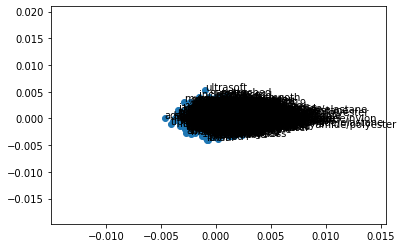

In [23]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

%matplotlib inline

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.show()

## 4. Kalkulasi Kemiripan

In [20]:
def matching(inputs):
    new_sentence = inputs.split(" ")
    print("Berikut adalah 10 produk yang mirip")
    tag = model.docvecs.most_similar(positive=[model.infer_vector(new_sentence)],topn=10)
    
    return tag

In [21]:
matching("Dream Angels Lace Bustier")

Berikut adalah 10 produk yang mirip


[('Everyday Perfect NEW! Curved-hem Thong Panty', 0.09447655081748962),
 ("Calvin Klein Women's Everyday Lightly Lined Demi Bra", 0.0854485034942627),
 ('Beauty Back Full-Figure Contour Bra 76380', 0.08393845707178116),
 ('Plus Size Long Sleeve Top 128LX', 0.08345155417919159),
 ('Cross-Dyed Crossover Bralette 597801', 0.08338158577680588),
 ('Coquette Lace Thong QD3536', 0.08321017026901245),
 ('b.active Low-Impact Underwire Sports Bra 953199', 0.08101905137300491),
 ('b.splendid Seamless Hipster 978255', 0.08077611029148102),
 ('Colorblocked Medium-Impact Sports Bra', 0.08065421134233475),
 ('Wireless High-Impact Sports Bra 852218', 0.07854851335287094)]

In [22]:
matching("clothes Cutouts between cups VS charm on side of cup")

Berikut adalah 10 produk yang mirip


[('Stark Beauty Underwire Contour Bra', 0.9307581186294556),
 ('Signature Lace Valerie Bralette', 0.9239935874938965),
 ('Very Sexy Lace Plunge Bodysuit', 0.9217633605003357),
 ('Body by Victoria Lace Romper', 0.9178318381309509),
 ('Lace Bralette', 0.9167251586914062),
 ('Dream Angels Racerback\xa0Tricot Babydoll', 0.9111872911453247),
 ('Basic Beauty Full-Figure Underwire Bra 855192', 0.909872829914093),
 ('Queen Anne’s Lace Hipster Panty', 0.9083741903305054),
 ('Very Sexy NEW! Satin Midi Slip', 0.9062913656234741),
 ('Aerie Backless Bare Bra', 0.9049458503723145)]